<a href="https://colab.research.google.com/github/Colsai/Small-Assignments/blob/main/ravens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Ravens Seasons (1996-)

In [61]:
#Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import statistics

In [62]:
#Seasons Df
tables = pd.read_html('https://www.pro-football-reference.com/teams/rav/index.htm', header = 1)
df = tables[0]

In [63]:
#Rename Columns
df = df.rename(columns={"Pts":"Off_Pts",
                        "Yds":"Off_Yds",
                        "Pts.1":"Def_Pts",
                        "Yds.1":"Def_Yds",
                        })

#Seasons

In [64]:
df.head(14)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,PD,Coaches,AV,Passer,Rusher,Receiver,Off_Pts,Off_Yds,Def_Pts,Def_Yds,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
0,2020,NFL,Baltimore Ravens,6,5,0,3rd of 4,NaN,282,214,68,Harbaugh,NaN,Jackson,Jackson,Brown,14,24,3,8,12,6,15,32,6.2,1.3,7.5,2.0,5.5
1,2019,NFL,Baltimore Ravens*,14,2,0,1st of 4,Lost Div,531,282,249,Harbaugh,Jackson,Jackson,Jackson,Andrews,1,2,3,4,6,1,1,32,15.6,0.1,15.6,11.0,4.7
2,2018,NFL,Baltimore Ravens*,10,6,0,1st of 4,Lost WC,389,287,102,Harbaugh,Mosley,Flacco,Edwards,Brown,13,9,2,1,22,6,1,32,6.4,0.6,7.0,0.6,6.4
3,2017,NFL,Baltimore Ravens,9,7,0,2nd of 4,NaN,395,303,92,Harbaugh,Mosley,Flacco,Collins,Wallace,9,27,6,12,1,8,21,32,5.8,-2.4,3.4,2.2,1.2
4,2016,NFL,Baltimore Ravens,8,8,0,2nd of 4,NaN,343,321,22,Harbaugh,Orr,Flacco,West,Wallace,21,17,9,7,9,13,8,32,1.4,0.2,1.5,-1.1,2.6
5,2015,NFL,Baltimore Ravens,5,11,0,3rd of 4,NaN,328,401,-73,Harbaugh,Yanda,Flacco,Forsett,Aiken,25,14,24,8,30,24,11,32,-4.6,2.6,-1.9,-0.7,-1.2
6,2014,NFL,Baltimore Ravens*,10,6,0,3rd of 4,Lost Div,409,302,107,Harbaugh,Yanda,Flacco,Forsett,Smith,8,12,6,8,14,6,8,32,6.7,-2.1,4.6,1.8,2.8
7,2013,NFL,Baltimore Ravens,8,8,0,3rd of 4,NaN,320,352,-32,Harbaugh,Suggs,Flacco,Rice,Smith,25,29,12,12,22,20,23,32,-2.0,-1.5,-3.5,-5.0,1.4
8,2012,NFL,Baltimore Ravens*,10,6,0,1st of 4,Won SB,398,344,54,Harbaugh,Ngata,Flacco,Rice,Boldin,10,16,12,17,8,11,15,32,3.4,-0.5,2.9,1.9,1.0
9,2011,NFL,Baltimore Ravens*,12,4,0,1st of 4,Lost Conf,378,266,112,Harbaugh,Ngata,Flacco,Rice,Boldin,12,15,3,3,11,5,5,32,7.0,-0.9,6.1,2.6,3.5


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


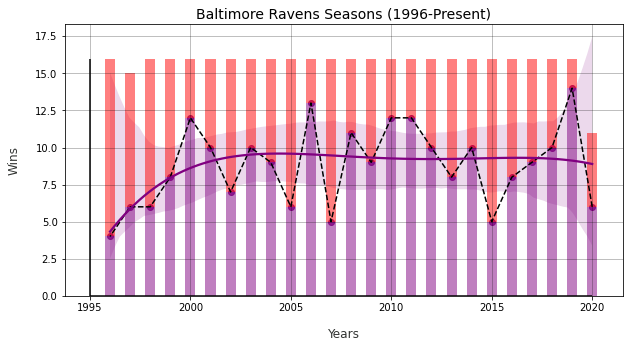

In [65]:
#Basic Plotting of All Things
year = df['Year']
win = df['W']
loss = df['L']
tie = df['T']

fig, ax = plt.subplots(1, figsize = (10,5))

ax.plot(year, win, '--', color = 'black',  linewidth = 1.5)
ax.bar(year, win, alpha = .5, color = 'purple',width = .5)
ax.bar(year, loss, alpha = .5, bottom=win, color = 'red',width = .5)
sns.regplot(year,win,order = 4, color = 'purple')

ax.set_title(f"Baltimore Ravens Seasons (1996-Present)", fontsize = 14)
ax.grid(which = 'both', alpha = .5, color='black', linestyle='-', linewidth=.5)
ax.hlines(y=0, xmin =1995, xmax = 2020)
ax.vlines(x=1995, ymin = 0, ymax = 16)
ax.set_xlabel("Years", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Wins", labelpad=15, fontsize=12, color="#333533");

## Points for / Points Against

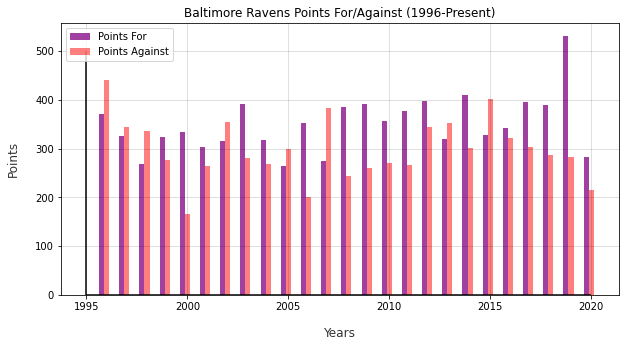

In [66]:
year = df['Year']
pt_for = df['PF']
pt_agst = df['PA']
pt_dif = df['PD']

fig, ax = plt.subplots(1, figsize = (10,5))

ax.bar(year - .25, pt_for, alpha = .75, color = 'purple', width = .25, label= "Points For")
ax.bar(year + 0, pt_agst, alpha = .5, color = 'red', width = .25, label= "Points Against")

ax.set_title(f"Baltimore Ravens Points For/Against (1996-Present)", fontsize = 12)
ax.grid(which = 'both', alpha = .25, color='black', linestyle='-', linewidth=.5)
ax.hlines(y=0, xmin =1995, xmax = 2020)
ax.vlines(x=1995, ymin = 0, ymax = 500)
ax.legend()
ax.set_xlabel("Years", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Points", labelpad=15, fontsize=12, color="#333533");

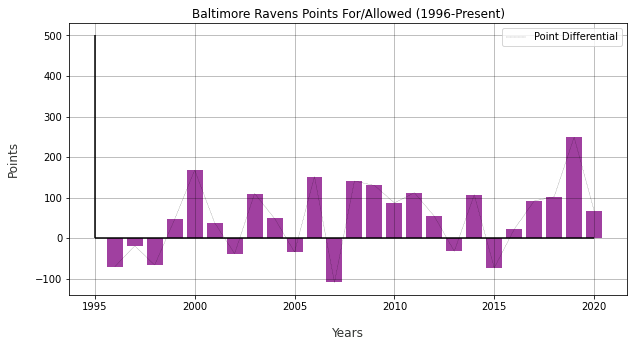

In [67]:
#Point Differential
year = df['Year']
pt_dif = df['PD']

fig, ax = plt.subplots(1, figsize = (10,5))

ax.plot(year, pt_dif, '--',  alpha = .75, color = 'black',  linewidth = .25, label= "Point Differential")
ax.bar(year, pt_dif, alpha = .75, color = 'purple', width = .8)

ax.set_title(f"Baltimore Ravens Points For/Allowed (1996-Present)", fontsize = 12)
ax.grid(which = 'both', alpha = .5, color='black', linestyle='-', linewidth=.5)
ax.hlines(y=0, xmin =1995, xmax = 2020)
ax.vlines(x=1995, ymin = 0, ymax = 500)
ax.legend()
ax.set_xlabel("Years", labelpad=15, fontsize=12, color="#333533");
ax.set_ylabel(f"Points", labelpad=15, fontsize=12, color="#333533");

Text(0, 0.5, 'Years')

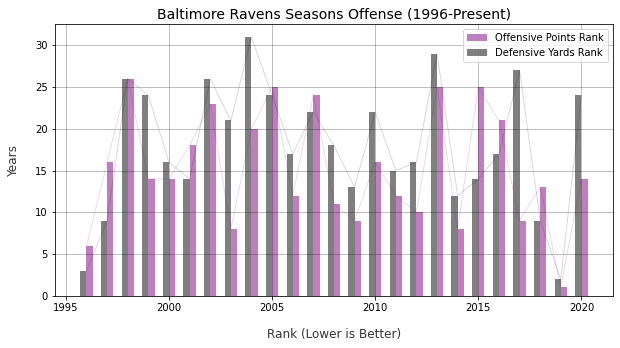

In [152]:
#Basic Plotting of All Things
Year = df["Year"]
off_pts = df["Off_Pts"]
off_yds = df["Off_Yds"]

fig, ax = plt.subplots(1, figsize = (10,5))

ax.bar(Year +.15, off_pts, width = .3,  alpha = .5, color = "purple", label = "Offensive Points Rank")
ax.plot(Year, off_pts, linewidth = 1,  alpha = .15, color = "purple")
ax.bar(Year -.15, off_yds, width = .3, alpha = .5, color = "black", label = "Defensive Yards Rank")
ax.plot(Year, off_yds, linewidth = 1,  alpha = .15, color = "black")

ax.legend()
ax.set_title(f"Baltimore Ravens Seasons Offense (1996-Present)", fontsize = 14)
ax.grid(which = 'both', alpha = .5, color='black', linestyle='-', linewidth=.5)
ax.set_xlabel("Rank (Lower is Better)", labelpad=15, fontsize=12, color="#333533")
ax.set_ylabel("Years", labelpad=15, fontsize=12, color="#333533")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


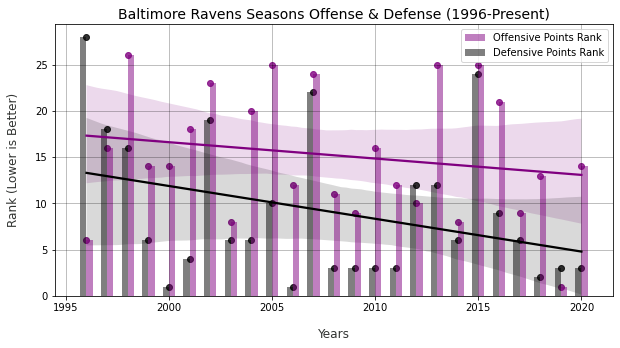

In [184]:
#Basic Plotting of All Things
year = df["Year"]
off_pts = df["Off_Pts"]
df_pts = df["Def_Pts"]

fig, ax = plt.subplots(1, figsize = (10,5))

ax.bar(year +.15, off_pts, alpha=.5, width = .3, color = 'purple', label = "Offensive Points Rank")
sns.regplot(year, off_pts, order = 1, color = "purple")

ax.bar(year -.15, df_pts, alpha=.5, width = .3, color = 'black', label = "Defensive Points Rank")
sns.regplot(year, df_pts, order = 1, color = "black")

'''
for i in range (0,33,8):
    ax.hlines(y=i,xmin=1994,xmax=2021, color="black", alpha = .5)
'''

ax.legend()
ax.set_title(f"Baltimore Ravens Seasons Offense & Defense (1996-Present)", fontsize = 14)
ax.set_xlabel("Years", labelpad=15, fontsize=12, color="#333533")
ax.set_ylabel("Rank (Lower is Better)", labelpad=15, fontsize=12, color="#333533")
ax.grid(which = 'both', alpha = .5, color='black', linestyle='-', linewidth=.5)